In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
np.random.seed(0)

Dogs: higher ear flappiness index, lower whisker length

In [30]:
dogs_whisker = np.random.normal(loc=5, scale=1, size=10)
dogs_ef_index = np.random.normal(loc=8, scale=1, size=10)

Cats: lower ear flappiness index, higher whisker length

In [31]:
cats_whisker = np.random.normal(loc=8, scale=1, size=10)
cats_ef_index = np.random.normal(loc=5, scale=1, size=10)

Plotting the data points

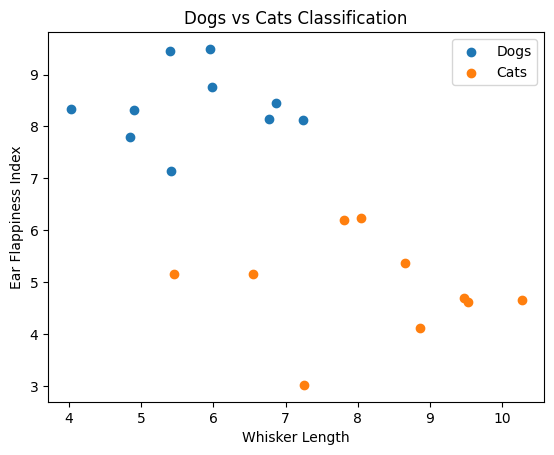

In [32]:
plt.scatter(dogs_whisker, dogs_ef_index, label='Dogs')
plt.scatter(cats_whisker, cats_ef_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification')
plt.legend()
plt.show()

Implementing random linear classifier

-> k is the hyperparameter 


-> d is dimentions or no. of parameters/features (here ear flap. index and whisker length)

In [33]:
def random_linear_classifier(dog_data, cat_data, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)#as d=2 it generates theta1 and theta2
        theta0 = np.random.normal()

        error = compute_error(dog_data, cat_data, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0

In [ ]:
def compute_error(dog_data, cat_data, theta, theta0):
    error = 0

    for x in dog_data:
        if np.dot(theta, x) + theta0 <= 0:
            error += 1
    for x in cat_data:
        if np.dot(theta, x) + theta0 > 0:
            error += 1

    return error

Prepare data for algo.(by stacking them together as x & y coordinate)

In [35]:
dog_data = np.vstack((dogs_whisker, dogs_ef_index)).T
cat_data = np.vstack((cats_whisker, cats_ef_index)).T

In [36]:
dog_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [37]:
cat_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

NOW running the ML [Linear classifier] code

In [38]:
k = 100
d = 2
best_theta, best_theta0 = random_linear_classifier(dog_data, cat_data, k, d)
best_theta, best_theta0

(array([-1.07075262,  1.05445173]), -0.40317694697317963)

In [39]:
# Plot the decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta [1])

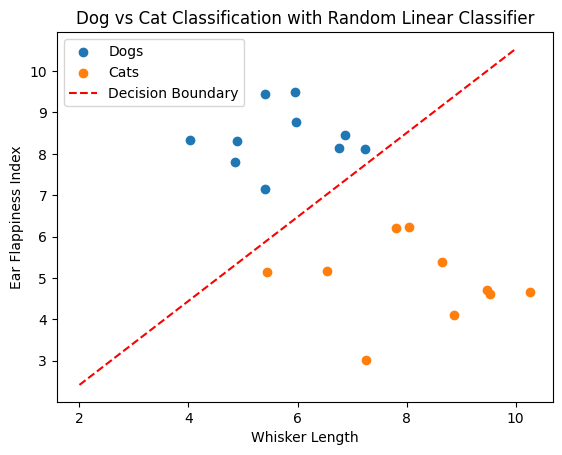

In [40]:
plt.scatter(dogs_whisker, dogs_ef_index, label='Dogs')
plt.scatter(cats_whisker, cats_ef_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel( 'Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()